<h1> Stock Market Analysis and Prediction </h1>

In this notebook, I'll be analyzing stock market data of 6 top companies (Netflix, Apple, Amazon, Google, Meta and Tesla). I'll use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib and also look at a few ways of analyzing the risk of a stock, based on its previous performance history. I'll also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

<h3>Getting the Data</h3>

The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: Reliably download historical market data from with Python

<h3>1. What was the change in price of the stock overtime?</h3>

In this section I'll be performaning some analysis of stocks using pandas, and analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

In [3]:
tech_list= ['NFLX','AAPL','META','TSLA','GOOG','AMZN']

# Set up End and Start times for data grab
end= datetime.now()
start = datetime(end.year-5,end.month,end.day)

for stock in tech_list:
    globals()[stock]= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
2018-01-09,22.344000,22.586666,21.826668,22.246000,22.246000,107199000
2018-01-10,22.146667,22.466667,22.000000,22.320000,22.320000,64648500
2018-01-11,22.349333,22.987333,22.217333,22.530001,22.530001,99682500
2018-01-12,22.575333,22.694000,22.244667,22.414667,22.414667,72376500
...,...,...,...,...,...,...
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

In [5]:
META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700
2018-01-09,188.699997,188.800003,187.100006,187.869995,187.869995,12393100
2018-01-10,186.940002,187.889999,185.630005,187.839996,187.839996,10529900
2018-01-11,188.399994,188.399994,187.380005,187.770004,187.770004,9588600
2018-01-12,178.059998,181.479996,177.399994,179.369995,179.369995,77551300
...,...,...,...,...,...,...
2022-12-30,118.160004,120.419998,117.739998,120.339996,120.339996,19492100
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100


We have only 1259 records for 5 years because weekends are not included in the data.

In [6]:
company_list=[NFLX,AAPL,META,TSLA,GOOG,AMZN]
company_name=["NETFLIX","APPLE","META","TESLA","GOOGLE","AMAZON"]

for company,comp_name in zip(company_list,company_name):
    company["company_name"]=comp_name
    
df=pd.concat(company_list,axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,NETFLIX
2018-01-09,212.110001,212.979996,208.589996,209.309998,209.309998,6125900,NETFLIX
2018-01-10,207.570007,213.639999,206.910004,212.520004,212.520004,5951500,NETFLIX
2018-01-11,214.289993,217.750000,213.350006,217.240005,217.240005,7659500,NETFLIX
2018-01-12,217.179993,222.550003,216.000000,221.229996,221.229996,8199400,NETFLIX
2018-01-16,224.240005,226.070007,217.199997,221.529999,221.529999,13516100,NETFLIX
2018-01-17,221.000000,221.149994,216.320007,217.500000,217.500000,9123100,NETFLIX
2018-01-18,220.339996,220.580002,216.550003,220.330002,220.330002,8225300,NETFLIX
2018-01-19,222.750000,223.490005,218.500000,220.460007,220.460007,10548600,NETFLIX


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7554 entries, 2018-01-08 to 2023-01-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7554 non-null   float64
 1   High          7554 non-null   float64
 2   Low           7554 non-null   float64
 3   Close         7554 non-null   float64
 4   Adj Close     7554 non-null   float64
 5   Volume        7554 non-null   int64  
 6   company_name  7554 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 472.1+ KB


In [8]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,217.647577,220.678404,214.702629,217.709349,217.709349,2.418072e+07
std,67.090874,67.665656,66.464666,67.081817,67.081817,1.683560e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,170.059998,172.525002,167.254997,170.205002,170.205002,1.491195e+07
50%,194.699997,197.389999,192.119995,194.470001,194.470001,2.003600e+07
75%,267.820007,270.434998,263.919998,266.865005,266.865005,2.816705e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


<h3> Closing Price </h3>

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

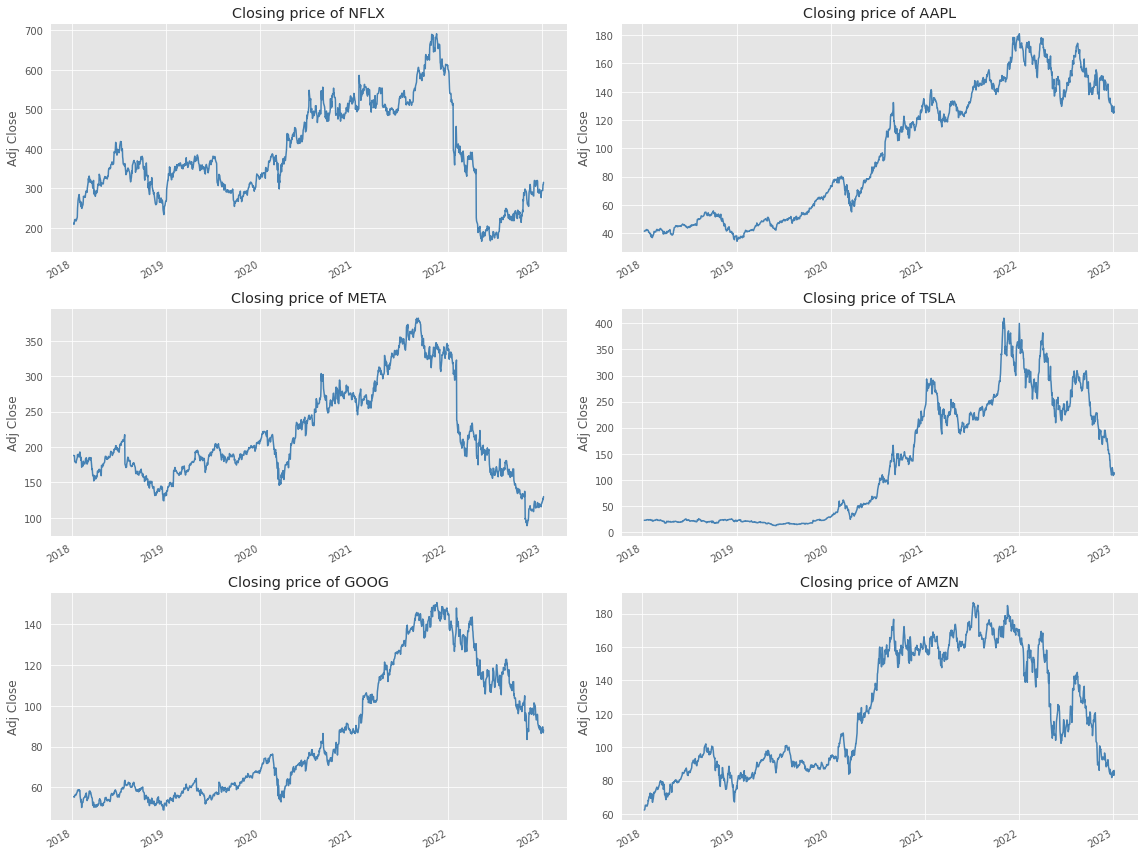

In [9]:
# Let's see a historical view of the closing price
sns.set_style('whitegrid')
plt.style.use("ggplot")
plt.figure(figsize=(16,12))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
  plt.subplot(3,2,i)
  company['Adj Close'].plot(color='steelblue')
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title('Closing price of {}'.format(tech_list[i-1]))

plt.tight_layout()

<h3> Volume of Sales</h3>

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

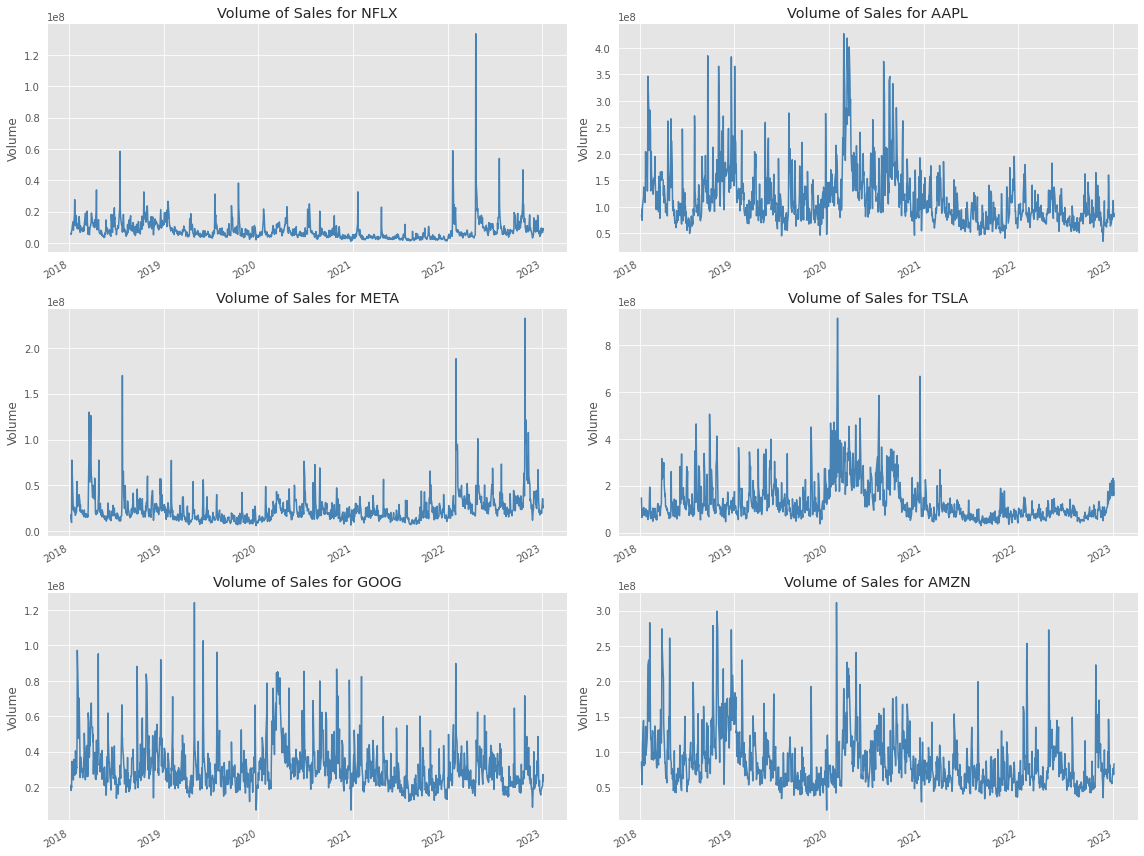

In [10]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
  plt.subplot(3,2,i)
  company['Volume'].plot(color='steelblue')
  plt.ylabel("Volume")
  plt.xlabel(None)
  plt.title("Volume of Sales for {}".format(tech_list[i-1]))

plt.tight_layout()

<h3> 2. What was the moving average of the various stocks? </h3>

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [11]:
ma_days=[10,30,180,365]

for ma in ma_days:
  for company in company_list:
    column_name= f"MA for {ma} days"
    company[column_name]= company['Adj Close'].rolling(ma).mean()

In [12]:
META.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 30 days,MA for 180 days,MA for 365 days
Date,,,,,,,,,,,
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700,META,NaN,NaN,NaN,NaN
2018-01-09,188.699997,188.800003,187.100006,187.869995,187.869995,12393100,META,NaN,NaN,NaN,NaN
2018-01-10,186.940002,187.889999,185.630005,187.839996,187.839996,10529900,META,NaN,NaN,NaN,NaN
2018-01-11,188.399994,188.399994,187.380005,187.770004,187.770004,9588600,META,NaN,NaN,NaN,NaN
2018-01-12,178.059998,181.479996,177.399994,179.369995,179.369995,77551300,META,NaN,NaN,NaN,NaN


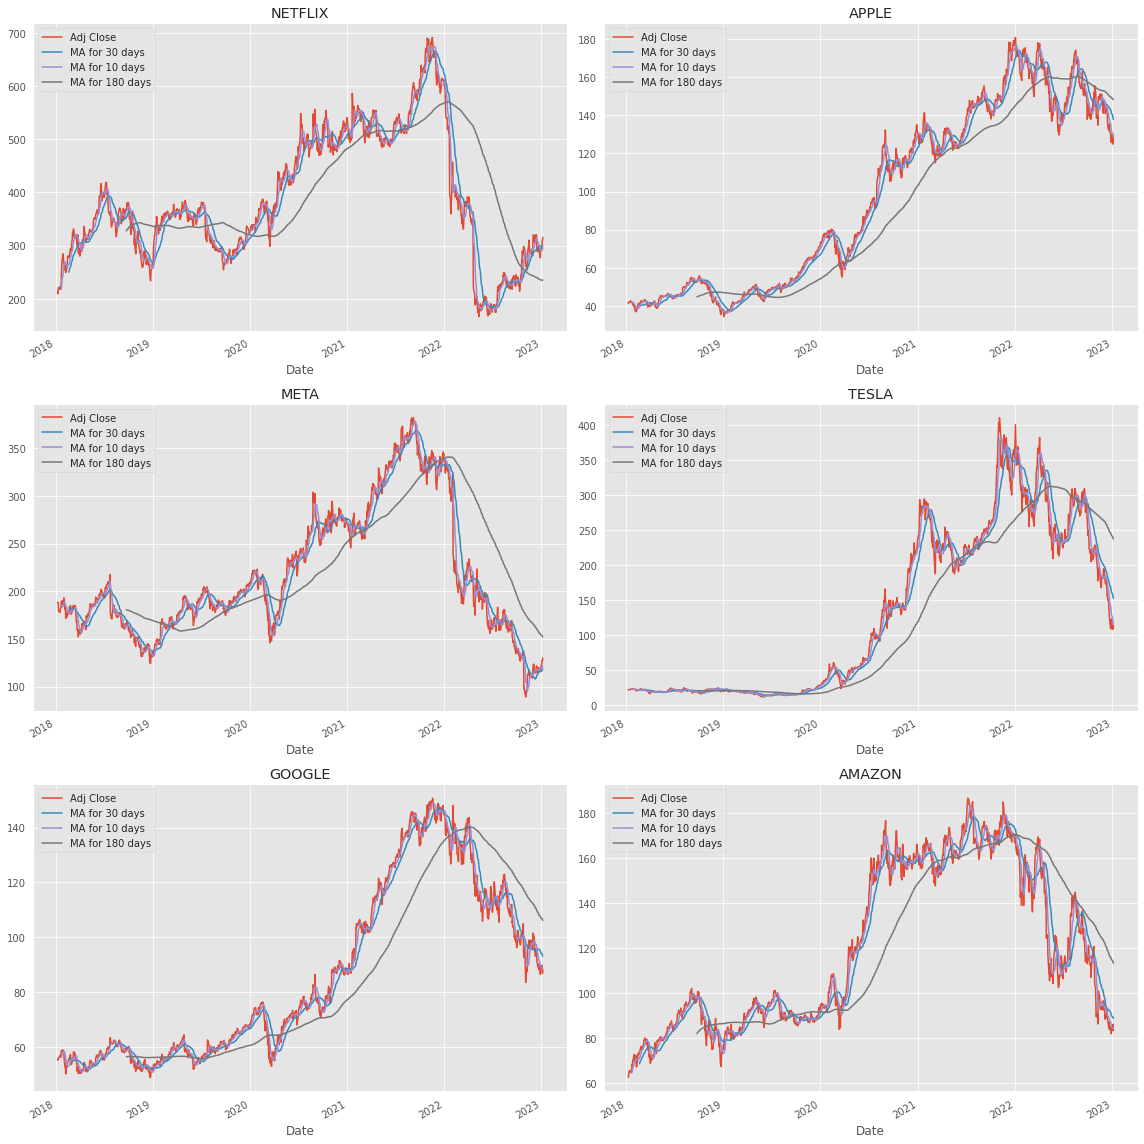

In [13]:
from re import TEMPLATE
fig,axes = plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(16)

NFLX[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[0,0])
axes[0,0].set_title("NETFLIX")

AAPL[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[0,1])
axes[0,1].set_title("APPLE")

META[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[1,0])
axes[1,0].set_title("META")

TSLA[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[1,1])
axes[1,1].set_title("TESLA")

GOOG[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[2,0])
axes[2,0].set_title("GOOGLE")

AMZN[['Adj Close','MA for 30 days','MA for 10 days','MA for 180 days']].plot(ax=axes[2,1])
axes[2,1].set_title("AMAZON")


plt.tight_layout()

We see in the graph that best value for moving average was 30 days because it still cpatures the trend in the data without noise.

<h3>3. What was the daily return of the stock on average?</h3>

 We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [14]:
META['Adj Close'].pct_change()

Date
2018-01-08         NaN
2018-01-09   -0.002178
2018-01-10   -0.000160
2018-01-11   -0.000373
2018-01-12   -0.044736
                ...   
2022-12-30    0.000665
2023-01-03    0.036563
2023-01-04    0.021084
2023-01-05   -0.003376
2023-01-06    0.024263
Name: Adj Close, Length: 1259, dtype: float64

Text(0.5, 0, '')

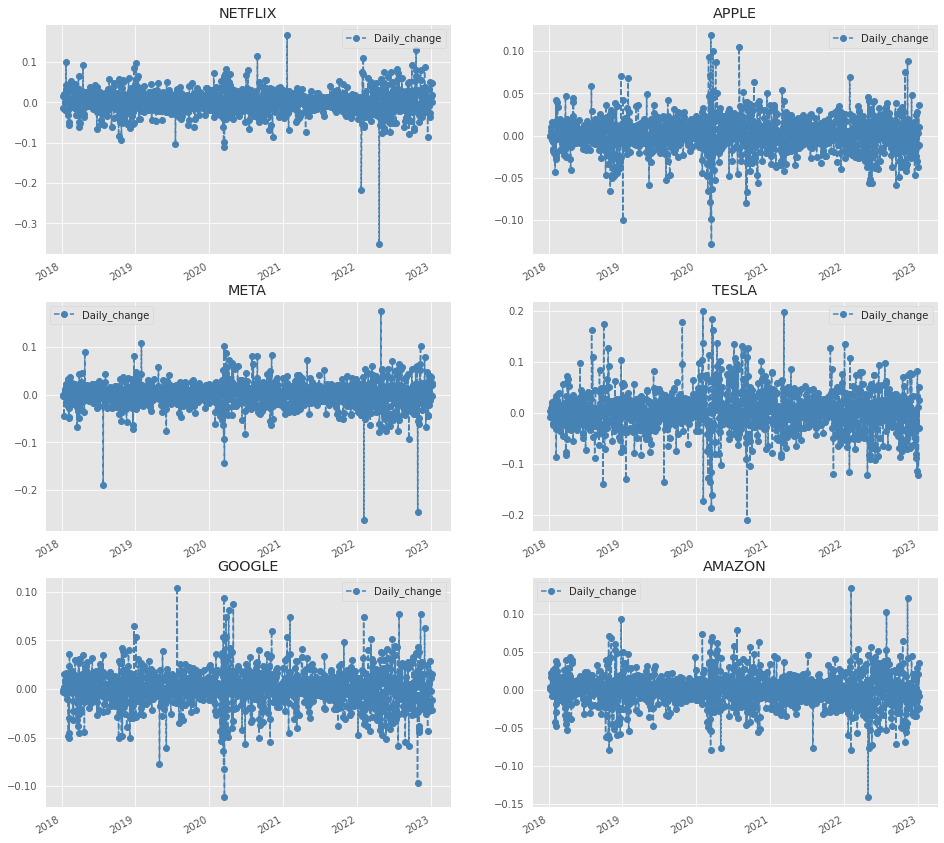

In [15]:
# We'll use pct_change to find the percent change for each day

for company in company_list:
  company['Daily_change']=company['Adj Close'].pct_change()

fig,axes=plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(16)


NFLX['Daily_change'].plot(ax=axes[0,0],color='steelblue',marker='o',linestyle='--',legend=True)
axes[0,0].set_title("NETFLIX")
axes[0,0].set_xlabel(None)

AAPL['Daily_change'].plot(ax=axes[0,1],color='steelblue',marker='o',linestyle='--',legend=True)
axes[0,1].set_title("APPLE")
axes[0,1].set_xlabel(None)

META['Daily_change'].plot(ax=axes[1,0],color='steelblue',marker='o',linestyle='--',legend=True)
axes[1,0].set_title("META")
axes[1,0].set_xlabel(None)

TSLA['Daily_change'].plot(ax=axes[1,1],color='steelblue',marker='o',linestyle='--',legend=True)
axes[1,1].set_title("TESLA")
axes[1,1].set_xlabel(None)

GOOG['Daily_change'].plot(ax=axes[2,0],color='steelblue',marker='o',linestyle='--',legend=True)
axes[2,0].set_title("GOOGLE")
axes[2,0].set_xlabel(None)

AMZN['Daily_change'].plot(ax=axes[2,1],color='steelblue',marker='o',linestyle='--',legend=True)
axes[2,1].set_title("AMAZON")
axes[2,1].set_xlabel(None)



<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

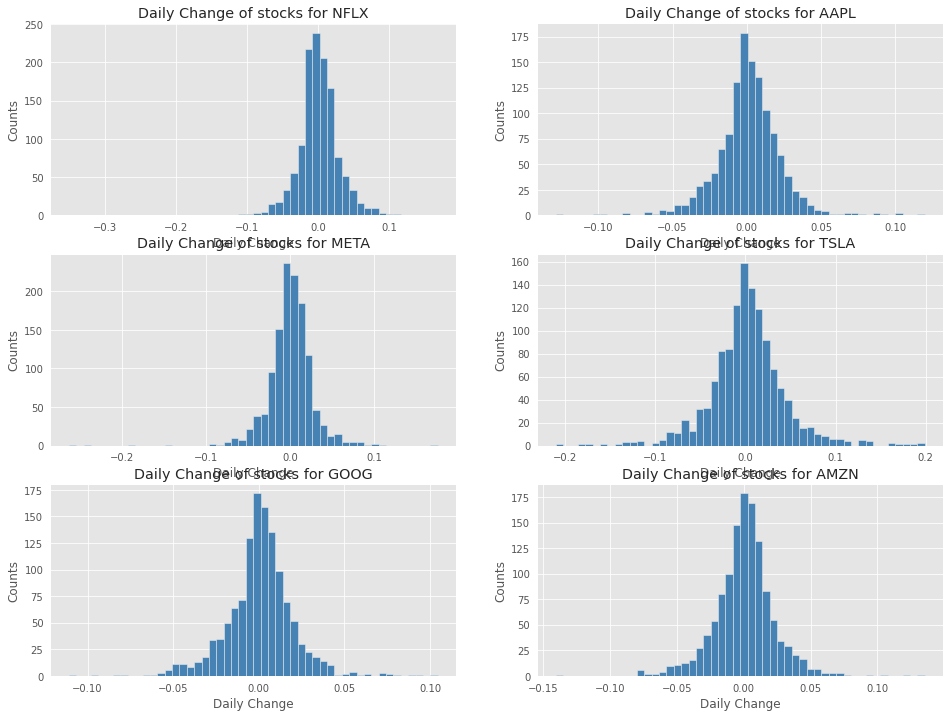

In [16]:
plt.figure(figsize=(16,12))

for i,company in enumerate(company_list,1):
  plt.subplot(3,2,i)
  company['Daily_change'].hist(bins=50,color='steelblue')
  plt.title("Daily Change of stocks for {}".format(tech_list[i-1]))
  plt.xlabel("Daily Change")
  plt.ylabel("Counts")

plt.tight_layout

<h3>4. What was the correlation between different stocks closing prices?</h3>

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame

d={}

for company,name in zip(company_list,company_name):
  d[name]=company['Adj Close']

closing_df= pd.DataFrame(d)



In [18]:
closing_df

,NETFLIX,APPLE,META,TESLA,GOOGLE,AMAZON
Date,,,,,,
2018-01-08,212.050003,41.447353,188.279999,22.427334,55.347000,62.343498
2018-01-09,209.309998,41.442589,187.869995,22.246000,55.313000,62.634998
2018-01-10,212.520004,41.433075,187.839996,22.320000,55.130501,62.716499
2018-01-11,217.240005,41.668423,187.770004,22.530001,55.276001,63.834000
2018-01-12,221.229996,42.098705,179.369995,22.414667,56.112999,65.260002
...,...,...,...,...,...,...
2022-12-30,294.880005,129.929993,120.339996,123.180000,88.730003,84.000000
2023-01-03,294.950012,125.070000,124.739998,108.099998,89.699997,85.820000
2023-01-04,309.410004,126.360001,127.370003,113.639999,88.709999,85.139999


In [19]:
tech_returns = closing_df.pct_change()
tech_returns.head()

,NETFLIX,APPLE,META,TESLA,GOOGLE,AMAZON
Date,,,,,,
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,-0.012922,-0.000115,-0.002178,-0.008085,-0.000614,0.004676
2018-01-10,0.015336,-0.000230,-0.000160,0.003326,-0.003299,0.001301
2018-01-11,0.022210,0.005680,-0.000373,0.009409,0.002639,0.017818
2018-01-12,0.018367,0.010326,-0.044736,-0.005119,0.015142,0.022339


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

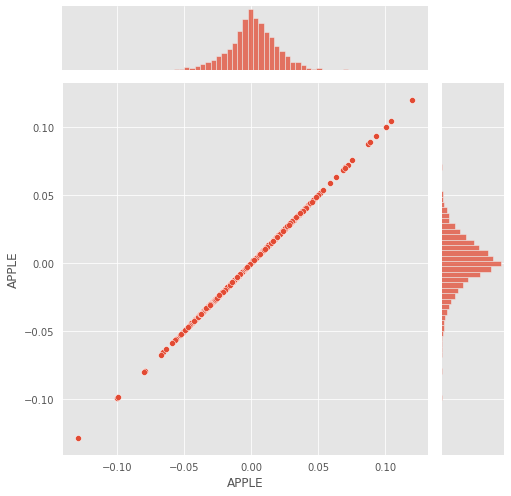

In [20]:
# Comparing APPLE to itself should show a perfectly linear relationship

sns.jointplot(x='APPLE', y='APPLE', data=tech_returns, kind='scatter',height=7)


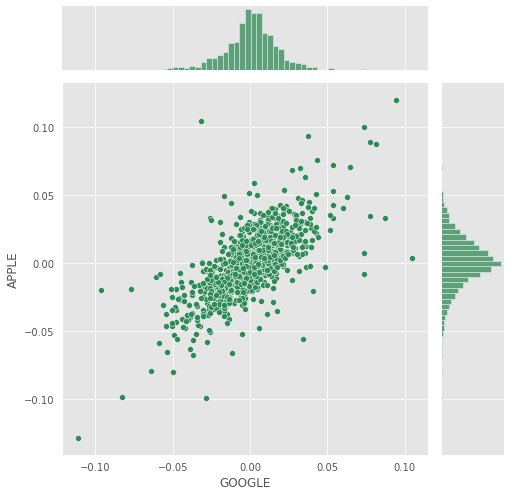

In [21]:
# We'll use joinplot to compare the daily returns of Google and APPLE

sns.jointplot(x='GOOGLE',y='APPLE',data=tech_returns,kind='scatter',height=7,color='seagreen')

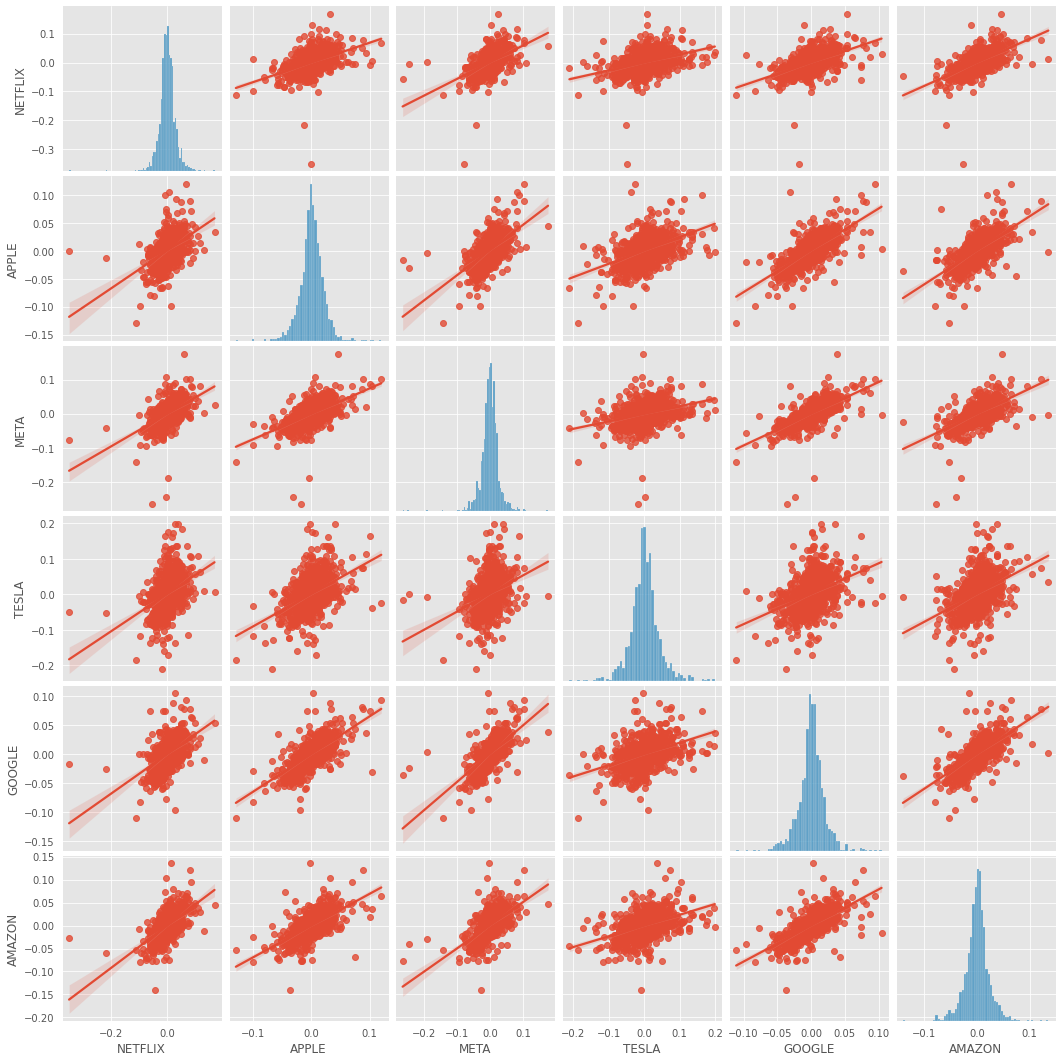

In [22]:
sns.pairplot(tech_returns,kind='reg')

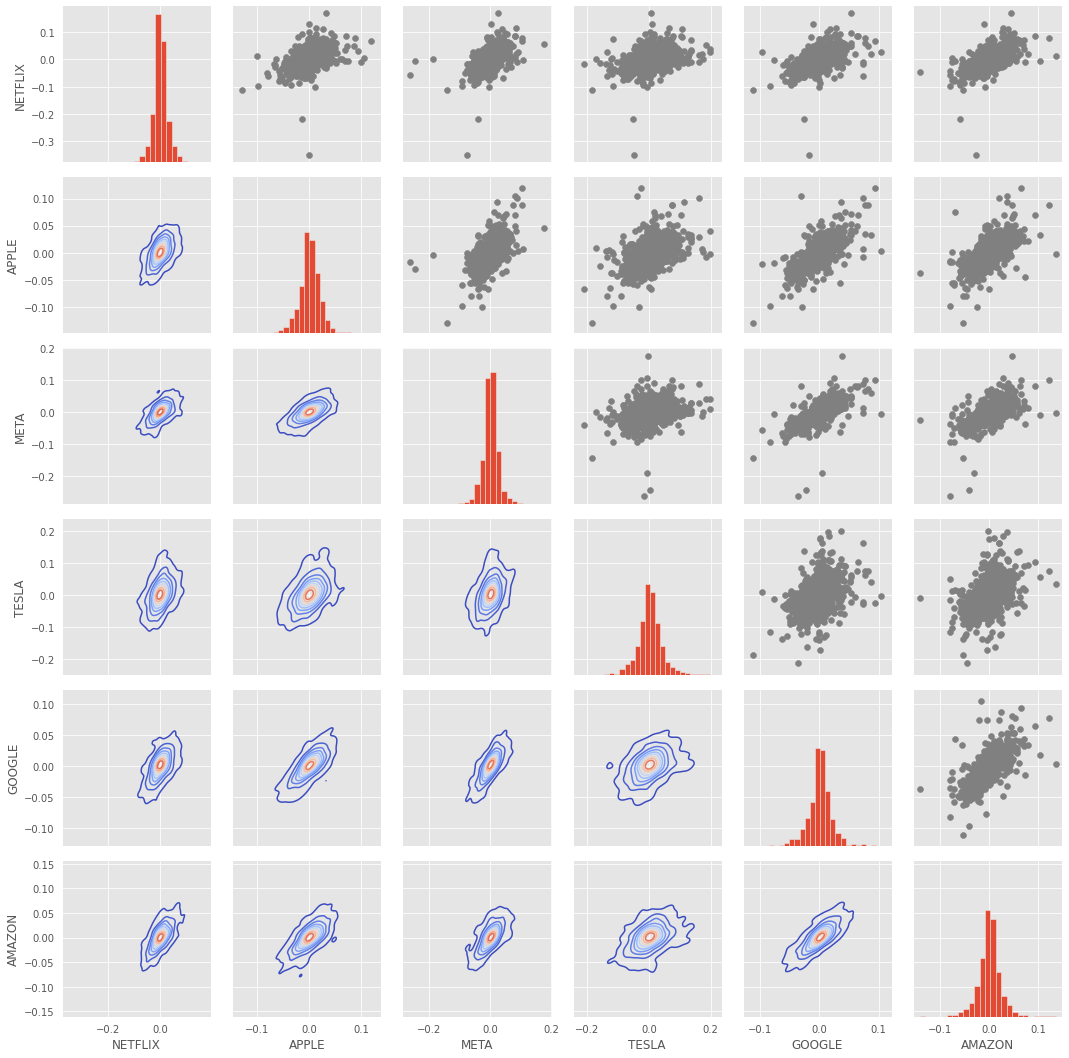

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame

return_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='grey')

return_fig.map_lower(sns.kdeplot,cmap='coolwarm')

return_fig.map_diag(plt.hist,bins=25)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.


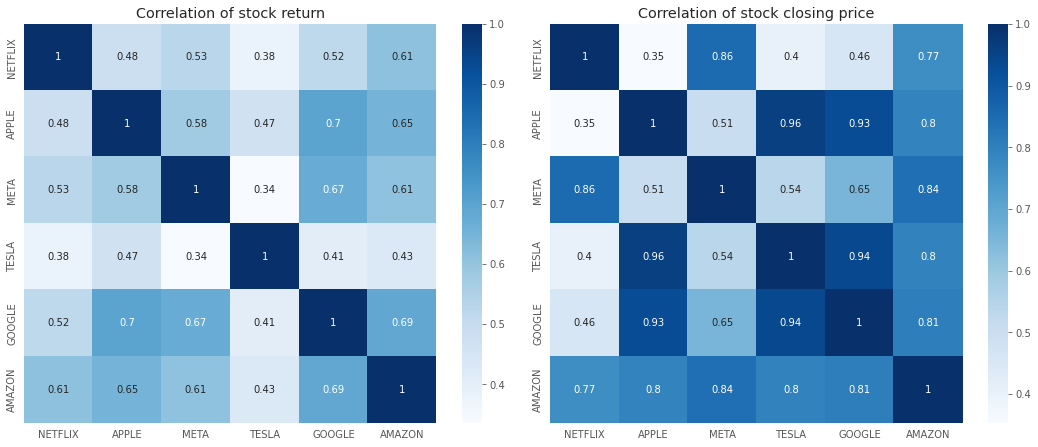

In [24]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True,cmap='Blues')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock closing price')
plt.tight_layout()

Just like we suspected in our PairPlot we see here numerically and visually that Google and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

<h3> 5. How much value do we put at risk by investing in a particular stock?  </h3>

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

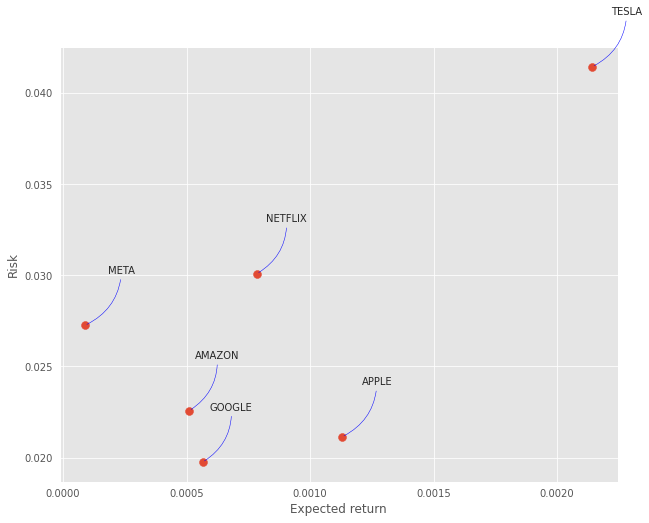

In [25]:
rets = tech_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

<h3>6. Predicting the closing price stock price of GOOGLE inc:</h3>

In [26]:
df=yf.download('GOOG',start='2012-01-01',end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [27]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19179300
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500


Text(0, 0.5, 'Close Price USD')

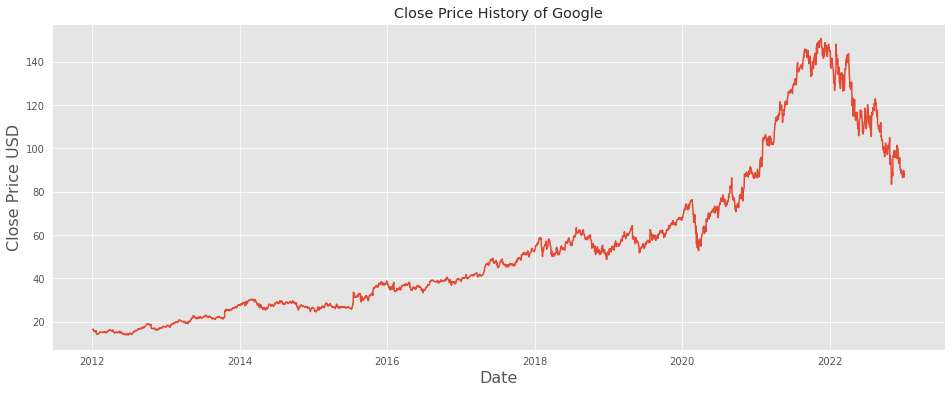

In [28]:
plt.figure(figsize=(16,6))
plt.plot(df['Close'])
plt.title('Close Price History of Google')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price USD',fontsize=16)


In [29]:
# Create a new dataframe with only the 'Close' column 
data= df[['Close']]

# Convert the dataframe to a numpy array
dataset= data.values

In [30]:
dataset

array([[16.57312965],
       [16.64461136],
       [16.41372681],
       ...,
       [88.70999908],
       [86.76999664],
       [88.16000366]])

In [31]:
# Get the number of rows to train the model on

len(dataset)

2772

In [33]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2634

In [90]:
# Scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[-1.08725723],
       [-1.08525823],
       [-1.09171498],
       ...,
       [ 0.93007115],
       [ 0.87581843],
       [ 0.91469037]])

In [91]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-1.08725723, -1.08525823, -1.09171498, -1.09797667, -1.11717283,
       -1.1166992 , -1.114735  , -1.11217182, -1.11541062, -1.11291012,
       -1.10989417, -1.10525536, -1.14257496, -1.14290234, -1.14609935,
       -1.15406756, -1.15503575, -1.14676105, -1.14835609, -1.14667051,
       -1.14616901, -1.14318792, -1.13537292, -1.1264853 , -1.12810125,
       -1.12595596, -1.12483457, -1.12870025, -1.12431915, -1.12601866,
       -1.12894404, -1.12827538, -1.12958484, -1.12306541, -1.12728633,
       -1.12856096, -1.12592113, -1.12633208, -1.12000769, -1.12010517,
       -1.11721462, -1.11801562, -1.12289125, -1.12936196, -1.12808037,
       -1.12784351, -1.13264255, -1.12922962, -1.12043257, -1.1216793 ,
       -1.11809918, -1.11537579, -1.10914891, -1.1094902 , -1.10496978,
       -1.1007419 , -1.10315183, -1.09845731, -1.10006625, -1.09397866])]
[-1.0990980795222893]

[array([-1.08725723, -1.08525823, -1.09171498, -1.09797667, -1.11717283,
       -1.1166992 , -1.114735  , -1.1

In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
2574/2574 [==============================] - 96s 36ms/step - loss: 0.0128
Epoch 2/5
2574/2574 [==============================] - 102s 40ms/step - loss: 0.0065
Epoch 3/5
2574/2574 [==============================] - 104s 40ms/step - loss: 0.0037
Epoch 4/5
2574/2574 [==============================] - 94s 36ms/step - loss: 0.0040
Epoch 5/5
2574/2574 [==============================] - 97s 38ms/step - loss: 0.0032


In [95]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 37ms/step


2.7538983478260706

<ipython-input-96-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


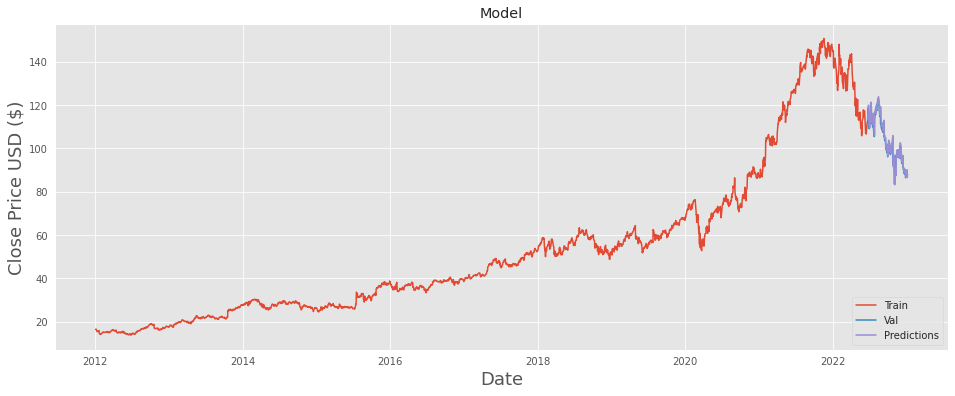

In [96]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [97]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-06-22,112.033997,113.573883
2022-06-23,112.684502,113.500519
2022-06-24,118.538002,113.584984
2022-06-27,116.622498,119.893669
2022-06-28,112.571503,117.645187
...,...,...
2022-12-30,88.730003,89.216614
2023-01-03,89.699997,89.320915
2023-01-04,88.709999,90.137863
